In [1]:
import numpy as np
import ppplot
from ppclass import pp
%matplotlib inline

In [2]:
ppplot.changefont(20)
import matplotlib.pyplot as mpl
mpl.rcParams['font.family'] = "times" # for good log major/minor ticks
mpl.rcParams['lines.linewidth'] = 3.0

In [3]:
dafile = "/home/aspiga/data/dynamico-giant/tprecast_999.nc"
def roughindex(ls):
    ## this is the year_th simulated year
    year = 14. # 11 similar
    return int(((year-1)*49.) + (ls*49./360.))
datab = [roughindex(300.),roughindex(70.)] ; print datab

[677, 646]


2005 Ls=300° profiles (limb). The three pressure grids are similar

In [4]:
l05_t = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/profils_temperature.txt",skiprows=1)
l05_p = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/pressure.txt") ; l05_p = l05_p*1.e5 # from bar to Pa
l05_y = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/profils_temperature.txt") ; l05_y = l05_y[0,:]

2015 Ls=70° profiles : nadir

In [5]:
n15_t = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/Nadir_temperature_may-june2015.txt",skiprows=1)
n15_p = l05_p
n15_y = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/Nadir_temperature_may-june2015.txt") ; n15_y = n15_y[0,:]

2015 Ls=70° profiles : limb

In [6]:
l15_t = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/Temperature_Limb2015.txt",skiprows=1) ; l15_t = l15_t[:,1:]
l15_p = l15_t[:,0]*1.e5 # from bar to Pa
l15_y = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/Temperature_Limb2015.txt") ; l15_y = l15_y[0,1:]

Fletcher 200 mb CIRS nadir retrievals from 2005 (Ls=300°)

In [7]:
n05_y, n05_tr, foo = np.loadtxt("/home/aspiga/work/my_pics/saturn/2018_05_analysis/cirs/tempxy_0.206470.dat",unpack=True) 

### Latitude-pressure sections

In [8]:
xp,yp = 12,6

/home/aspiga/soft/conda/miniconda2/envs/py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


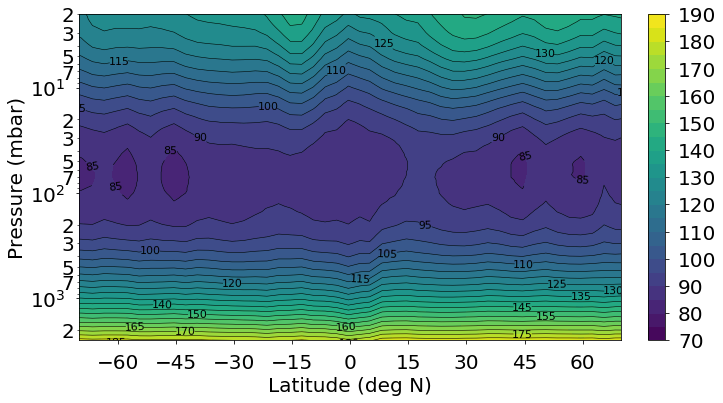

In [9]:
zefig = ppplot.figuref(x=xp,y=yp)
pl = ppplot.plot2d(fig=zefig)
pl.f, pl.x, pl.y = n15_t, n15_y, n15_p / 100. # mbar
pl.colorbar = "viridis"
pl.logy, pl.invert = True, True
pl.ylabel, pl.xlabel = "Pressure (mbar)", "Latitude (deg N)"
pl.xmin,pl.xmax = -70.,70.
pl.ymin,pl.ymax = 2.5e3,2
pl.vmin,pl.vmax,pl.div,pl.fmt = 70,190,24,"%.0f"
pl.c, pl.clab, pl.cfmt = pl.f, True, '%.0f'
pl.clev = np.linspace(50,200,31)
pl.make()
ppplot.save(filename="cirs_section",mode="pdf")
ppplot.save(filename="cirs_section",mode="png",res=300)

/home/aspiga/soft/planetoplot/modules/ppclass.py:1854: RuntimeWarning: invalid value encountered in greater
  self.field = self.f.variables[self.var][tupledim]
/home/aspiga/soft/planetoplot/modules/ppclass.py:1944: RuntimeWarning: invalid value encountered in greater_equal
  masked = np.ma.masked_where(np.abs(self.field) >= self.missing,self.field)
/home/aspiga/soft/planetoplot/modules/ppplot.py:291: RuntimeWarning: invalid value encountered in less
  else:          what_I_plot[ what_I_plot < zevmin*(1.+small_enough) ] = zevmin*(1.+small_enough)
/home/aspiga/soft/planetoplot/modules/ppplot.py:292: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > miss  ] = -miss
/home/aspiga/soft/planetoplot/modules/ppplot.py:293: RuntimeWarning: invalid value encountered in greater
  what_I_plot[ what_I_plot > zevmax ] = zevmax*(1.-small_enough)


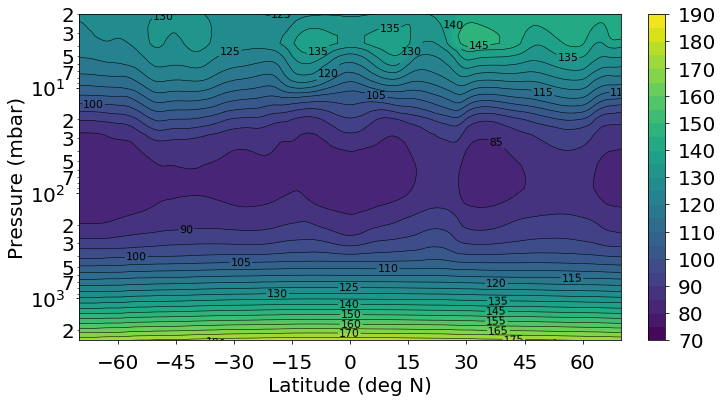

In [10]:
tmodel,foo,latmodel,foo,timeaxis = pp(file=dafile,var="temperature",x=999,useindex="1000",t=roughindex(70.)).getfd()
pmodel = pp(file=dafile,var="p",x=999,y=0,t=0).getf()
zefig = ppplot.figuref(x=xp,y=yp)
pl2 = ppplot.plot2d(fig=zefig)
pl2.f, pl2.x, pl2.y = tmodel, latmodel, pmodel / 100.
pl2.colorbar = pl.colorbar
pl2.logy,pl2.invert = pl.logy, pl.invert
pl2.xmin, pl2.xmax = pl.xmin, pl.xmax
pl2.ymin, pl2.ymax = pl.ymin, pl.ymax
pl2.vmin, pl2.vmax = pl.vmin, pl.vmax
pl2.ylabel, pl2.xlabel = pl.ylabel, pl.xlabel
pl2.div, pl2.fmt = pl.div, pl.fmt
pl2.c, pl2.clab, pl2.cfmt = pl2.f, True, '%.0f'
pl2.clev = np.linspace(50,200,31)
pl2.make()
ppplot.save(filename="model_section",mode="pdf")
ppplot.save(filename="model_section",mode="png",res=300)

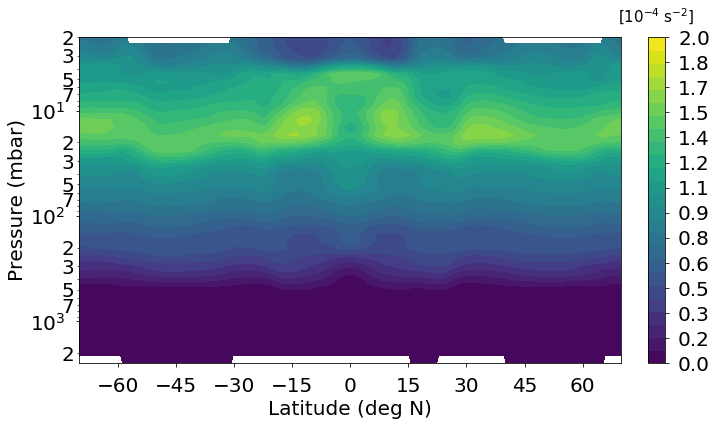

In [11]:
indt = str(roughindex(0.))+","+str(roughindex(360.))
N2model,foo,latmodel,foo,timeaxis = pp(file=dafile,var="N2",x=999,useindex="1000",t=indt).getfd() #roughindex(70.)).getfd()
pmodel = pp(file=dafile,var="p",x=999,y=0,t=0).getf()
zefig = ppplot.figuref(x=xp,y=yp)
pl2 = ppplot.plot2d(fig=zefig)
pl2.f, pl2.x, pl2.y = N2model, latmodel, pmodel / 100.
pl2.colorbar = pl.colorbar
pl2.logy,pl2.invert = pl.logy, pl.invert
pl2.xmin, pl2.xmax = pl.xmin, pl.xmax
pl2.ymin, pl2.ymax = pl.ymin, pl.ymax
pl2.ylabel, pl2.xlabel = pl.ylabel, pl.xlabel
###
pl2.vmax = 2
pl2.vmin = 0
pl2.div = 25
pl2.fmt = '%.1f'
pl2.f = pl2.f * 10000.
pl2.units = '$10^{-4}$ s$^{-2}$'
###
pl2.make()
ppplot.save(filename="model_section_N2",mode="pdf")
ppplot.save(filename="model_section_N2",mode="png",res=300)

### 2 mbar : both CIRS nadir and limb can be compared to modeling

In [12]:
ptarget = 2. # in mbar (hPa)
diff = np.abs(l05_p - ptarget*100.) ; w = np.where(diff == np.min(diff))
l05_tr, n15_tr, l15_tr = np.squeeze(l05_t[w[0],:]), np.squeeze(n15_t[w[0],:]), np.squeeze(l15_t[w[0],:])

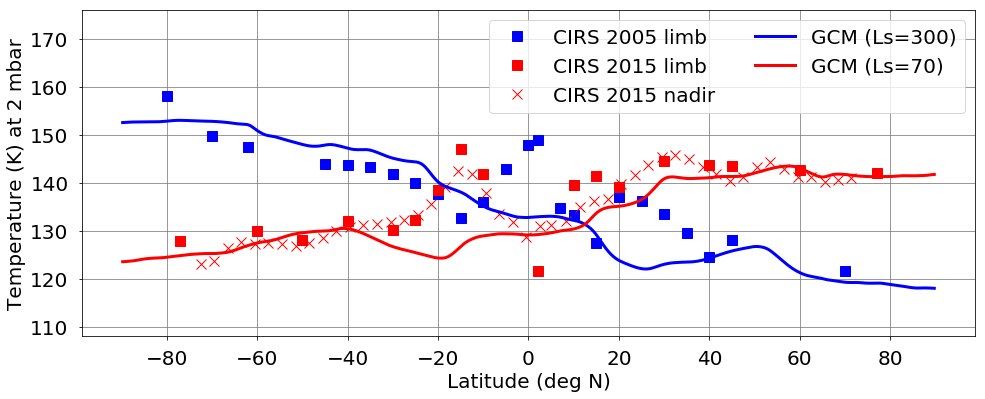

In [13]:
zefig = ppplot.figuref(x=16,y=6)
mer = ppplot.plot1d(fig=zefig,linestyle="",xlabel="Latitude (deg N)",ylabel="Temperature (K) at 2 mbar",ymin=108,ymax=176,nyticks=8)
mer.f, mer.x, mer.legend, mer.color, mer.marker = l05_tr, l05_y, "CIRS 2005 limb", "b", "s" ; mer.make()
mer.f, mer.x, mer.legend, mer.color, mer.marker = l15_tr, l15_y, "CIRS 2015 limb", "r", "s" ; mer.make()
mer.f, mer.x, mer.legend, mer.color, mer.marker = n15_tr, n15_y, "CIRS 2015 nadir", "r", "x" ; mer.make()
ff,xx,yy,zz,tt = pp(file=dafile,var="temperature",x=999,z=ptarget*100.,useindex="1000",t=datab).getfd()
mer.f, mer.x, mer.legend, mer.color, mer.marker, mer.linestyle = ff[0], yy[0], "GCM (Ls=300)", "b", "", "-" ; mer.make()
mer.f, mer.x, mer.legend, mer.color, mer.marker, mer.linestyle = ff[1], yy[1], "GCM (Ls=70)" , "r", "", "-" ; mer.make()
mpl.legend(loc='upper right',ncol=2)
ppplot.save(filename="comparison_2mbar",mode="pdf")
ppplot.save(filename="comparison_2mbar",mode="png",res=300)

### Seasonal trend at 200 mbar : CIRS vs. model
CIRS nadir data contains information on temperature from about 500 mbar to 70 mbar (then from 5 to 0.5 mbar)

In [14]:
ptarget = 200. # in mbar (hPa)
diff = np.abs(l05_p - ptarget*100.) ; w = np.where(diff == np.min(diff))
l05_tr, n15_tr, l15_tr = np.squeeze(l05_t[w[0],:]), np.squeeze(n15_t[w[0],:]), np.squeeze(l15_t[w[0],:])

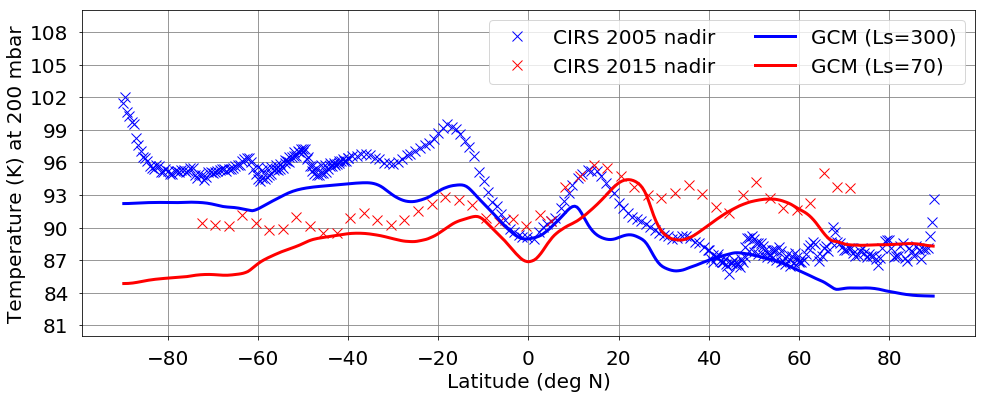

In [15]:
zefig = ppplot.figuref(x=16,y=6)
mer = ppplot.plot1d(fig=zefig,linestyle="",xlabel="Latitude (deg N)",ylabel="Temperature (K) at 200 mbar",ymin=80,ymax=110,nyticks=10)
mer.f, mer.x, mer.legend, mer.color, mer.marker = n05_tr, n05_y, "CIRS 2005 nadir", "b", "x" ; mer.make()
mer.f, mer.x, mer.legend, mer.color, mer.marker = n15_tr, n15_y, "CIRS 2015 nadir", "r", "x" ; mer.make()
ff,xx,yy,zz,tt = pp(file=dafile,var="temperature",x=999,z=ptarget*100.,useindex="1000",t=datab).getfd()
mer.f, mer.x, mer.legend, mer.color, mer.marker, mer.linestyle = ff[0], yy[0], "GCM (Ls=300)" , "b", "", "-" ; mer.make()
mer.f, mer.x, mer.legend, mer.color, mer.marker, mer.linestyle = ff[1], yy[1], "GCM (Ls=70)" , "r", "", "-" ; mer.make()
import matplotlib.pyplot as mpl
mpl.legend(loc='upper right',ncol=2)
ppplot.save(filename="comparison_200mbar",mode="pdf")
ppplot.save(filename="comparison_200mbar",mode="png",res=300)

### Meridional profile at 2 bar

In [16]:
def roughindex(ls,year):
    ## this is the year_th simulated year
    return int(((year-1)*49.) + (ls*49./360.))

year = 14
dat = "%i,%i" % (roughindex(0.,year),roughindex(360.,year))
print dat

637,686


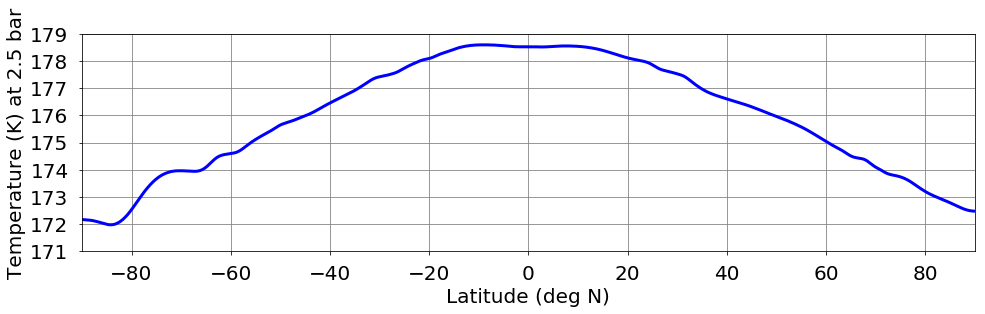

In [17]:
ptarget = 2500. # in mbar (hPa)
zefig = ppplot.figuref(x=16,y=4)
mer = ppplot.plot1d(fig=zefig,linestyle="",xlabel="Latitude (deg N)",ylabel="Temperature (K) at 2.5 bar")
ff,xx,yy,zz,tt = pp(file=dafile,var="temperature",x=999,z=ptarget*100.,useindex="1000",t=dat).getfd()
mer.f, mer.x = ff, yy
mer.linestyle, mer.marker, mer.color = "-", "", "b"
mer.xmin, mer.xmax = -90, +90
mer.ymin, mer.ymax, mer.nyticks = 171, 179, 8
mer.make()
ppplot.save(filename="mer_2500mbar",mode="pdf")
ppplot.save(filename="mer_2500mbar",mode="png",res=300)

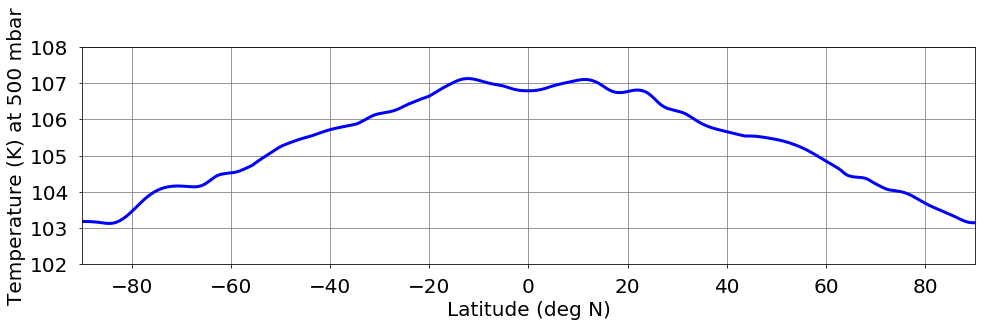

In [18]:
ptarget = 500. # in mbar (hPa)
zefig = ppplot.figuref(x=16,y=4)
mer = ppplot.plot1d(fig=zefig,linestyle="",xlabel="Latitude (deg N)",ylabel="Temperature (K) at 500 mbar")
ff,xx,yy,zz,tt = pp(file=dafile,var="temperature",x=999,z=ptarget*100.,useindex="1000",t=dat).getfd()
mer.f, mer.x = ff, yy
mer.linestyle, mer.marker, mer.color = "-", "", "b"
mer.xmin, mer.xmax = -90, +90
mer.ymin, mer.ymax, mer.nyticks = 102, 108, 6
mer.make()
ppplot.save(filename="mer_500mbar",mode="pdf")
ppplot.save(filename="mer_500mbar",mode="png",res=300)

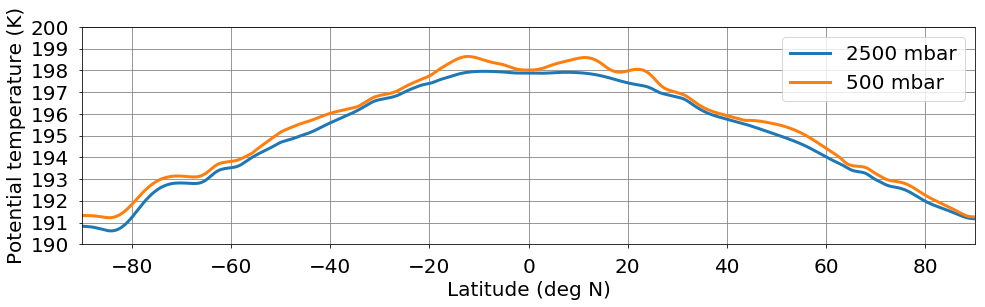

In [19]:
zefig = ppplot.figuref(x=16,y=4)
for ptarget in [2500.,500.]: # in mbar (hPa)
    mer = ppplot.plot1d(fig=zefig,linestyle="",xlabel="Latitude (deg N)",ylabel="Potential temperature (K)")
    ff,xx,yy,zz,tt = pp(file=dafile,var="tpot",x=999,z=ptarget*100.,useindex="1000",t=dat).getfd()
    mer.f, mer.x = ff, yy
    mer.linestyle, mer.marker = "-", ""
    #, mer.color 
    mer.xmin, mer.xmax = -90, +90
    mer.ymin, mer.ymax, mer.nyticks = 190, 200, 10
    mer.legend = "%i mbar" % (ptarget)
    mer.make()
#ppplot.save(filename="mer_tpot",mode="pdf")
#ppplot.save(filename="mer_tpot",mode="png",res=300)

### spin-up and steady-state

In [20]:
dayperyear = 24430.
secondperday = 38052.
outputfreq = 500.
deltafile = outputfreq / dayperyear
print deltafile

0.0204666393778


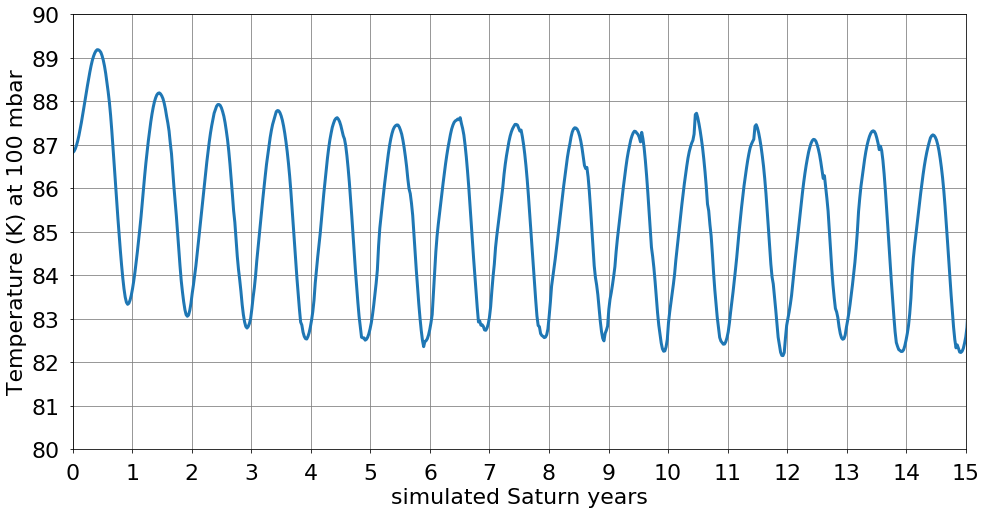

In [21]:
seas = pp(quiet=True,nopickle=True)
seas.xp = 16
seas.yp = 8
seas.file = dafile
seas.var = "temperature"
seas.x = 999
seas.y = "20,60"
seas.z = 10000.
seas.ymin, seas.ymax, seas.ylabel = 80., 90., "Temperature (K) at 100 mbar"
seas.xcoeff = deltafile
seas.xmin, seas.xmax, seas.xlabel, seas.nxticks = 0, 15, "simulated Saturn years", 15
seas.useindex = "1000"
seas.linestyle, seas.marker = "-",""
seas.get()
m = seas.plot()
seas.filename = "temperature_100mb_NH"
seas.out = "pdf"
m = seas.plot()
seas.out = "png"
seas.res = 300
m = seas.plot()
seas.out = None
seas.res = 150

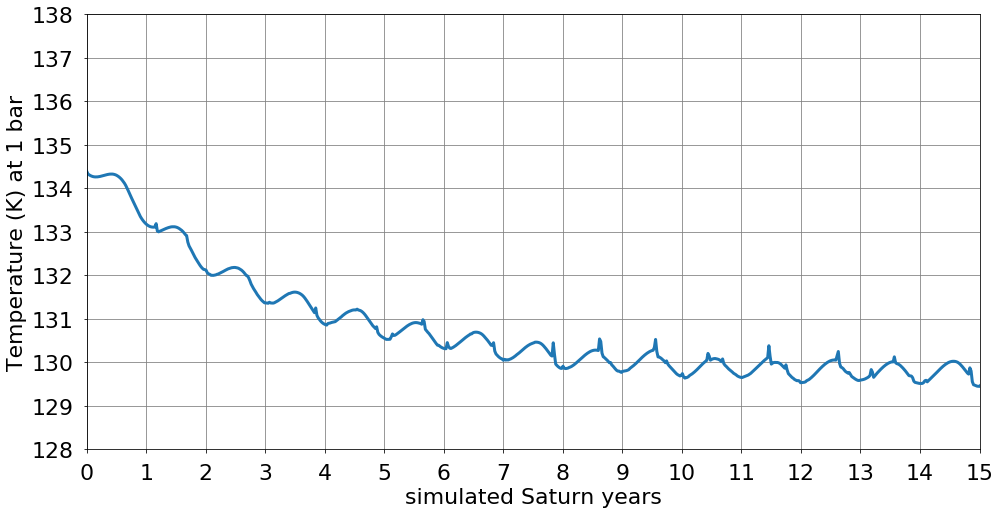

In [22]:
seas.z = 100000.
seas.ymin, seas.ymax, seas.ylabel = 128., 138., "Temperature (K) at 1 bar"
seas.get()
m = seas.plot()
seas.filename = "temperature_1b_NH"
seas.out = "pdf"
m = seas.plot()
seas.out = "png"
seas.res = 300
m = seas.plot()
seas.out = None
seas.res = 150

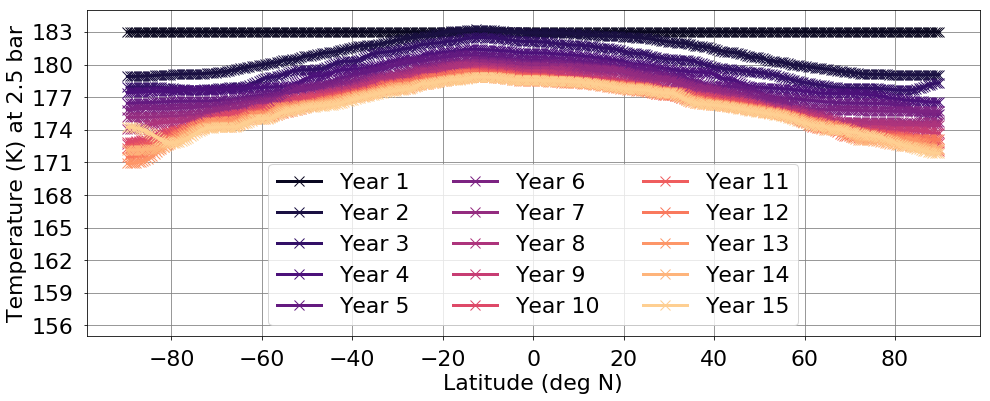

In [23]:
colorm = "magma" #"brg" #"magma"
from matplotlib.cm import get_cmap
import numpy as np
pal = get_cmap(name=colorm)
coltab = [pal(i) for i in np.linspace(0,0.9,16)]

def roughindex(ls,year):
    ## this is the year_th simulated year
    return int(((year-1)*49.) + (ls*49./360.))

ptarget = 2500. # in mbar (hPa)
zefig = ppplot.figuref(x=16,y=6)
mer = ppplot.plot1d(fig=zefig,linestyle="",xlabel="Latitude (deg N)",ylabel="Temperature (K) at 2.5 bar",ymin=155,ymax=185)


for year in np.arange(1,16):
    ff,xx,yy,zz,tt = pp(file=dafile,var="temperature",x=999,z=ptarget*100.,useindex="1000",t=roughindex(0.,year)).getfd()
    mer.f, mer.x, mer.legend = ff, yy, "Year %i" % (year)
    mer.linestyle = None
    mer.color = coltab[year]
    mer.make()
    
import matplotlib.pyplot as mpl
mpl.legend(loc='lower center',ncol=3)